In [1]:
#dominant color extraction

In [2]:
import cv2
import numpy as np 

In [3]:
im = cv2.imread("bottom_right.jpg")
print(im.shape)

(300, 300, 3)


In [4]:
import matplotlib.pyplot as plt

AxesImage(54,36;334.8x217.44)
(300, 300, 3)


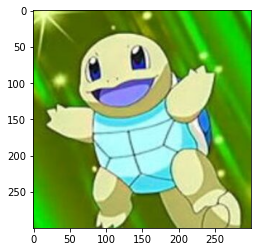

In [5]:
print(plt.imshow(im))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

In [6]:
#Flatten each channel of te image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(90000, 3)


In [7]:
from sklearn.cluster import KMeans

In [8]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [9]:
centers =km.cluster_centers_

In [10]:
centers = np.array(centers,dtype='uint8')
print(centers)

[[  6 131  67]
 [110 170 159]
 [240 225 145]
 [177 234 229]]


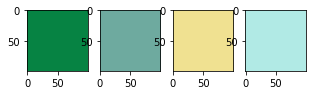

In [11]:
#plot what all colors are these
plt.figure(0,figsize= (5,5))
i=1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    i=i+1
    
    colors.append(each_col)
    
    #color swatch
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()    

In [12]:
#segementing image
new_img = np.zeros((300*300,3),dtype='uint8')
print(new_img.shape)

(90000, 3)


In [13]:
colors

[array([  6, 131,  67], dtype=uint8),
 array([110, 170, 159], dtype=uint8),
 array([240, 225, 145], dtype=uint8),
 array([177, 234, 229], dtype=uint8)]

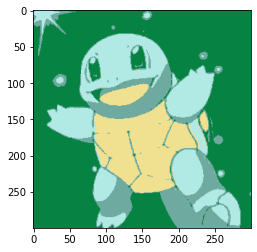

In [14]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img=new_img.reshape((original_shape))   
plt.imshow(new_img)
plt.show()